## Using awsRekognition for Facial Reverse Matching

In [1]:
import boto3
session = boto3.Session(profile_name = "rekognitionTest")

In [2]:
rekog = session.client('rekognition')

In [3]:
with open('./imgs/amit3.jpg', 'rb') as f:
    imgbytes = f.read()

response = rekog.detect_faces(Image={'Bytes': imgbytes}, Attributes=['ALL'])

In [4]:
print (response)

{'FaceDetails': [{'BoundingBox': {'Width': 0.3398394286632538, 'Height': 0.3800068795681, 'Left': 0.3289715051651001, 'Top': 0.33639243245124817}, 'AgeRange': {'Low': 43, 'High': 51}, 'Smile': {'Value': True, 'Confidence': 89.9354019165039}, 'Eyeglasses': {'Value': True, 'Confidence': 99.9998779296875}, 'Sunglasses': {'Value': False, 'Confidence': 89.54959869384766}, 'Gender': {'Value': 'Male', 'Confidence': 99.99576568603516}, 'Beard': {'Value': False, 'Confidence': 99.06441497802734}, 'Mustache': {'Value': False, 'Confidence': 99.99547576904297}, 'EyesOpen': {'Value': True, 'Confidence': 98.76566314697266}, 'MouthOpen': {'Value': False, 'Confidence': 98.94429779052734}, 'Emotions': [{'Type': 'HAPPY', 'Confidence': 91.2109375}, {'Type': 'SURPRISED', 'Confidence': 1.2464523315429688}, {'Type': 'CALM', 'Confidence': 0.354766845703125}, {'Type': 'CONFUSED', 'Confidence': 0.04105567932128906}, {'Type': 'SAD', 'Confidence': 0.0020265579223632812}, {'Type': 'ANGRY', 'Confidence': 0.00173449

### In the above you can use some data for culling bad images from files as well as from the camera
* make sure user is facing towards the camera (roll, pitch, yaw filtering)_
* Quality of the image
* Face Occluded or not
* The image width and height etc 

# Compare Faces - Imposter 
### If FaceMatches == 0, then it means that it found no faceMatch

In [12]:
   
imageSource=open('./imgs/amit1.jpg','rb')
imageTarget=open('./imgs/imposter.jpg','rb')
response=rekog.compare_faces(SimilarityThreshold=80,
                                  SourceImage={'Bytes': imageSource.read()},
                                  TargetImage={'Bytes': imageTarget.read()})



In [19]:
print (response['FaceMatches'])

[]


# Compare Faces - Same Person

In [20]:
   
imageSource=open('./imgs/amit1.jpg','rb')
imageTarget2=open('./imgs/amit3.jpg','rb')
response=rekog.compare_faces(SimilarityThreshold=80,
                                  SourceImage={'Bytes': imageSource.read()},
                                  TargetImage={'Bytes': imageTarget2.read()})




In [22]:
print(response['FaceMatches'])

[{'Similarity': 99.67813873291016, 'Face': {'BoundingBox': {'Width': 0.3398394286632538, 'Height': 0.3800068795681, 'Left': 0.3289715051651001, 'Top': 0.33639243245124817}, 'Confidence': 99.99761962890625, 'Landmarks': [{'Type': 'eyeLeft', 'X': 0.4116629660129547, 'Y': 0.45672863721847534}, {'Type': 'eyeRight', 'X': 0.5633454322814941, 'Y': 0.4588465392589569}, {'Type': 'mouthLeft', 'X': 0.42357006669044495, 'Y': 0.6065652966499329}, {'Type': 'mouthRight', 'X': 0.5513277649879456, 'Y': 0.6084927916526794}, {'Type': 'nose', 'X': 0.48492631316185, 'Y': 0.5503383874893188}], 'Pose': {'Roll': 0.4388854205608368, 'Yaw': -1.534895896911621, 'Pitch': -5.722479343414307}, 'Quality': {'Brightness': 96.94283294677734, 'Sharpness': 26.1773681640625}}}]


## End of Demo for Jason

#  Collections

### Create a Collection 

In [25]:
collection_id = 'amitCollection'
#response=rekog.create_collection(CollectionId=collection_id)

#print('Collection ARN: ' + response['CollectionArn'])
#print('Status code: ' + str(response['StatusCode']))


In [26]:
response=rekog.describe_collection(CollectionId=collection_id)
bucket = 'rekognition-test-bucket-amit'
photo = 'imposter.jpg'
print ("Number of Faces in Collection = ", response['FaceCount'])

Number of Faces in Collection =  3


### Adding Faces to the Collection 

In [32]:
bucket = 'rekognition-test-bucket-amit'
photo = 'amit1.jpg'
response=rekog.index_faces(CollectionId=collection_id,
                                Image={'S3Object':{'Bucket':bucket,'Name':photo}},
                                ExternalImageId=photo,
                                MaxFaces=1,
                                QualityFilter="AUTO",
                                DetectionAttributes=['ALL'])

In [34]:
response=rekog.describe_collection(CollectionId=collection_id)
print ("Number of Faces in Collection = ", response['FaceCount'])

Number of Faces in Collection =  1


In [35]:
bucket = 'rekognition-test-bucket-amit'
photo = 'amit2.jpg'
response=rekog.index_faces(CollectionId=collection_id,
                                Image={'S3Object':{'Bucket':bucket,'Name':photo}},
                                ExternalImageId=photo,
                                MaxFaces=1,
                                QualityFilter="AUTO",
                                DetectionAttributes=['ALL'])

In [12]:
response=rekog.describe_collection(CollectionId=collection_id)
print ("Number of Faces in Collection = ", response['FaceCount'])

Number of Faces in Collection =  3


In [13]:
bucket = 'rekognition-test-bucket-amit'
photo = 'imposter.jpg'
response=rekog.index_faces(CollectionId=collection_id,
                                Image={'S3Object':{'Bucket':bucket,'Name':photo}},
                                ExternalImageId=photo,
                                MaxFaces=1,
                                QualityFilter="AUTO",
                                DetectionAttributes=['ALL'])

In [14]:
response=rekog.describe_collection(CollectionId=collection_id)
print ("Number of Faces in Collection = ", response['FaceCount'])

Number of Faces in Collection =  3


## Search for a face in a collection 

In [27]:
fileName = 'amit3.jpg'
threshold = 80
maxFaces = 4

response=rekog.search_faces_by_image(CollectionId=collection_id,
                                Image={'S3Object':{'Bucket':bucket,'Name':fileName}},
                                FaceMatchThreshold=threshold,
                                MaxFaces=maxFaces)

In [28]:
response

{'SearchedFaceBoundingBox': {'Width': 0.3489183485507965,
  'Height': 0.39561396837234497,
  'Left': 0.33235692977905273,
  'Top': 0.3154362142086029},
 'SearchedFaceConfidence': 99.99554443359375,
 'FaceMatches': [{'Similarity': 99.96903228759766,
   'Face': {'FaceId': '0beb16c9-2ed8-4486-964d-86b9edf831bc',
    'BoundingBox': {'Width': 0.5044209957122803,
     'Height': 0.7723479866981506,
     'Left': 0.24385200440883636,
     'Top': 0.10264699906110764},
    'ImageId': '11251362-e156-363c-900a-2fc2f7891cd6',
    'ExternalImageId': 'amit2.jpg',
    'Confidence': 99.99840545654297}},
  {'Similarity': 99.92837524414062,
   'Face': {'FaceId': '7c43eed3-0e80-4a69-8e41-483792a944ab',
    'BoundingBox': {'Width': 0.388264000415802,
     'Height': 0.45758700370788574,
     'Left': 0.30007800459861755,
     'Top': 0.16377100348472595},
    'ImageId': '0e797843-c0a2-3db2-b8c5-f3001731c87d',
    'ExternalImageId': 'amit1.jpg',
    'Confidence': 99.98739624023438}}],
 'FaceModelVersion': '5.0'

In [ ]:
if __name__ == "__main__":

    bucket='bucket'
    collectionId='MyCollection'
    fileName='input.jpg'
    threshold = 70
    maxFaces=2

    client=boto3.client('rekognition')

  
    response=client.search_faces_by_image(CollectionId=collectionId,
                                Image={'S3Object':{'Bucket':bucket,'Name':fileName}},
                                FaceMatchThreshold=threshold,
                                MaxFaces=maxFaces)

                                
    faceMatches=response['FaceMatches']
    print ('Matching faces')
    for match in faceMatches:
            print ('FaceId:' + match['Face']['FaceId'])
            print ('Similarity: ' + "{:.2f}".format(match['Similarity']) + "%")
            print


In [26]:
import boto3

def add_faces_to_collection(bucket,photo,collection_id):


    
    client=boto3.client('rekognition')

    response=client.index_faces(CollectionId=collection_id,
                                Image={'S3Object':{'Bucket':bucket,'Name':photo}},
                                ExternalImageId=photo,
                                MaxFaces=1,
                                QualityFilter="AUTO",
                                DetectionAttributes=['ALL'])

    print ('Results for ' + photo) 	
    print('Faces indexed:')						
    for faceRecord in response['FaceRecords']:
         print('  Face ID: ' + faceRecord['Face']['FaceId'])
         print('  Location: {}'.format(faceRecord['Face']['BoundingBox']))

    print('Faces not indexed:')
    for unindexedFace in response['UnindexedFaces']:
        print(' Location: {}'.format(unindexedFace['FaceDetail']['BoundingBox']))
        print(' Reasons:')
        for reason in unindexedFace['Reasons']:
            print('   ' + reason)
    return len(response['FaceRecords'])

def main():
    bucket='bucket'
    collection_id='collection'
    photo='photo'
    
    
    indexed_faces_count=add_faces_to_collection(bucket, photo, collection_id)
    print("Faces indexed count: " + str(indexed_faces_count))


if __name__ == "__main__":
    main()

{'FaceCount': 0,
 'FaceModelVersion': '5.0',
 'CollectionARN': 'arn:aws:rekognition:us-west-1:282688048941:collection/amitCollection',
 'CreationTimestamp': datetime.datetime(2021, 5, 16, 16, 54, 23, 816000, tzinfo=tzlocal()),
 'ResponseMetadata': {'RequestId': 'b5ca6868-b69b-4e98-91e3-c23fab2841a8',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Sun, 16 May 2021 22:57:12 GMT',
   'x-amzn-requestid': 'b5ca6868-b69b-4e98-91e3-c23fab2841a8',
   'content-length': '164',
   'connection': 'keep-alive'},
  'RetryAttempts': 0}}

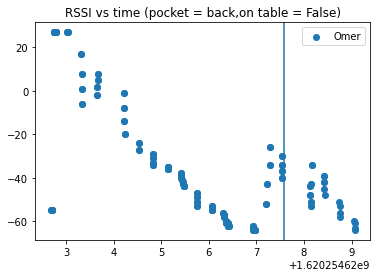

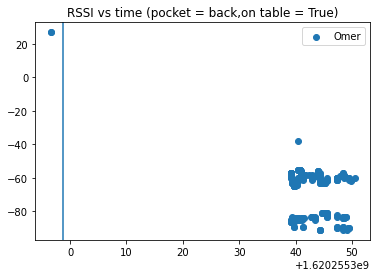

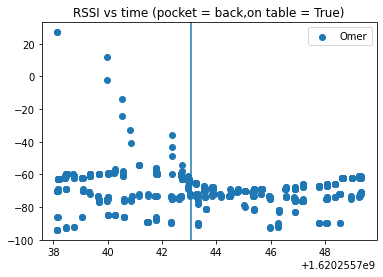

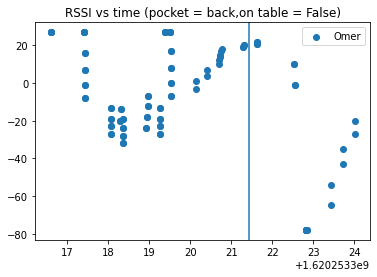

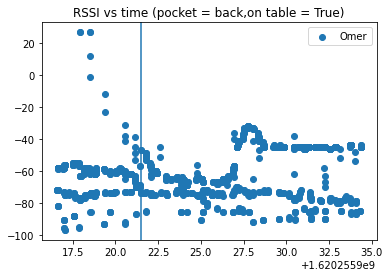

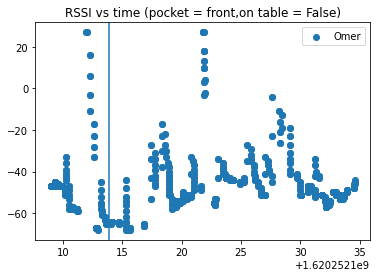

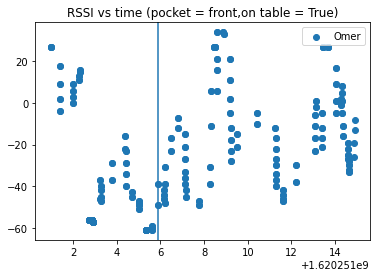

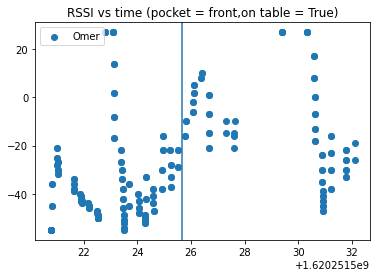

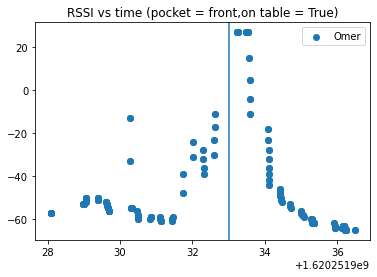

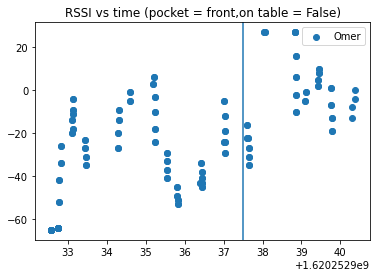

In [1]:
import os 
import yaml
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

csv_files_back = []
yaml_files_back = []



mypath = os.getcwd() + "/moving_experiments/omer_back/"
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in files:
    if file[-1] == 'l':
        yaml_files_back.append(mypath + file)
    else:
        csv_files_back.append(mypath+ file)


csv_files_front = []
yaml_files_front = []

mypath = os.getcwd() + "/moving_experiments/omer_front/"
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for file in files:
    if file[-1] == 'l':
        yaml_files_front.append(mypath + file)
    else:
        csv_files_front.append(mypath+ file)

        
data_frames = []

for file in yaml_files_back:

    with open(file, 'r') as yaml_file:
        yaml_dic = yaml.safe_load(yaml_file)
        
        df = pd.read_csv ("moving_experiments/omer_back/omer_back_{}_rssi.csv".format(yaml_dic['session']))
        df = df.drop_duplicates()
        df["pocket"] = yaml_dic['pocket']
        df["on_table"] = yaml_dic['on_table'] 
        data_frames.append((df, yaml_dic['start_time'], yaml_dic['pocket'], yaml_dic['on_table']))
        
for file in yaml_files_front:

    with open(file, 'r') as yaml_file:
        yaml_dic = yaml.safe_load(yaml_file)
        
        df = pd.read_csv ("moving_experiments/omer_front/omer_front_{}_rssi.csv".format(yaml_dic['session']))
        df = df.drop_duplicates()
        df["pocket"] = yaml_dic['pocket']
        df["on_table"] = yaml_dic['on_table'] 
        data_frames.append((df[df['experiment phone'] == True], yaml_dic['start_time'], yaml_dic['pocket'], yaml_dic['on_table']))


del data_frames[8]
del data_frames[2]
neg_data_frames = []

for df, start_time, pocket, on_table in data_frames:

    
    neg_data_frames.append((df[(df['experiment phone'] == True) & (df['RSSI'] < 0)], start_time, pocket, on_table))


for df, start_time, pocket, on_table in data_frames:
    x  = df['timestamp'].tolist()
    y = df['RSSI'].tolist()

    plt.scatter(x, y, label = "Omer")
    plt.axvline(x=start_time+5)
    plt.title('RSSI vs time (pocket = {},on table = {})'.format(pocket, on_table))
    plt.legend()
    plt.show()
    
   

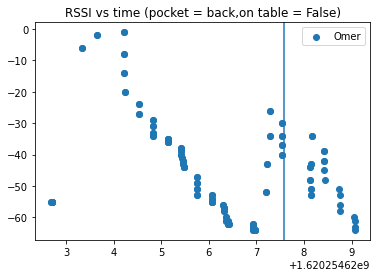

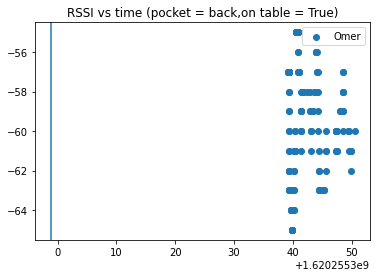

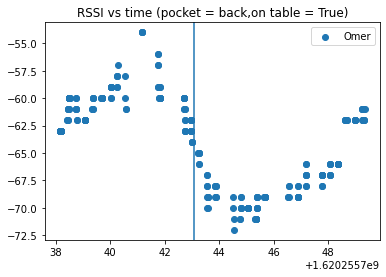

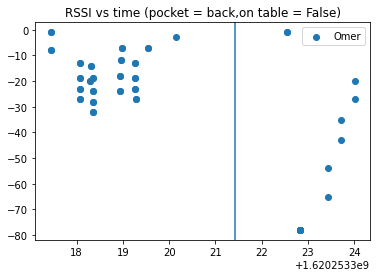

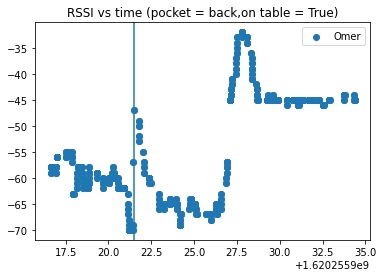

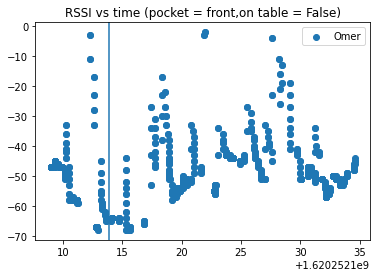

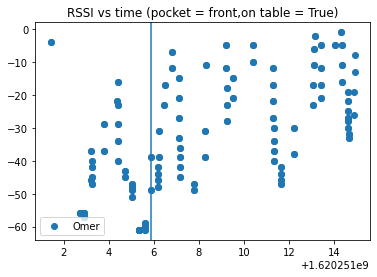

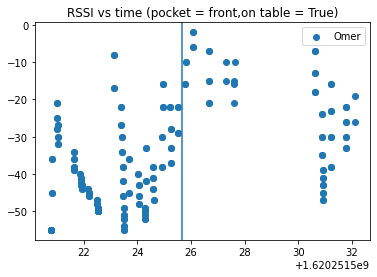

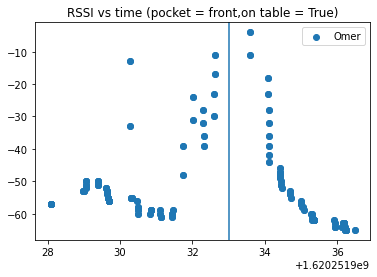

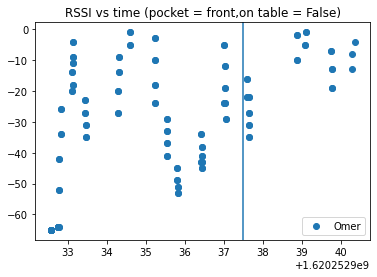

In [2]:
 
for df, start_time, pocket, on_table in neg_data_frames:
    x  = df['timestamp'].tolist()
    y = df['RSSI'].tolist()

    plt.scatter(x, y, label = "Omer")
    plt.axvline(x=start_time+5)
    plt.title('RSSI vs time (pocket = {},on table = {})'.format(pocket, on_table))
    plt.legend()
    plt.show()

    